In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [ ]:
# Read the data from a CSV file
pokemon = pd.read_csv('https://raw.githubusercontent.com/zekuva/Udacity-datasets/main/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [ ]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
pkmn_types.head(10)
#pkmn_types.shape

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [ ]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [ ]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

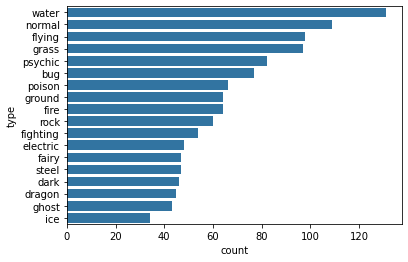

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

Example 2 - Step 1. Find the Correction 1: the variable 'identifier' shown in the video is actually the 'species' column in the dataset.


In [ ]:
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [ ]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [ ]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

The xticks and yticks functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

I've also added a ylabel call to make it clear that we're no longer working with straight counts.

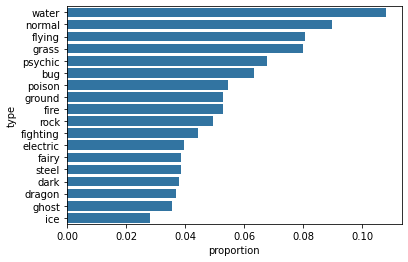

In [ ]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

Example 3. Print the text (proportion) on the bars of a horizontal plot.

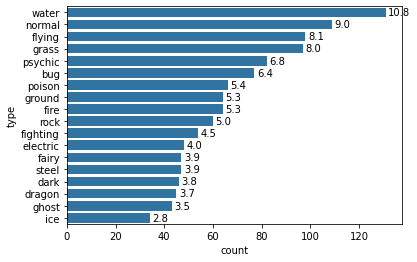

In [ ]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')


Example 4. Print the text (proportion) below the bars of a Vertical plot.

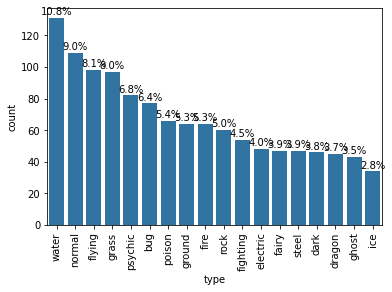

In [ ]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

Tip - Is the text on the bars not readable clearly? Consider changing the size of the plot by using the following:

In [ ]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

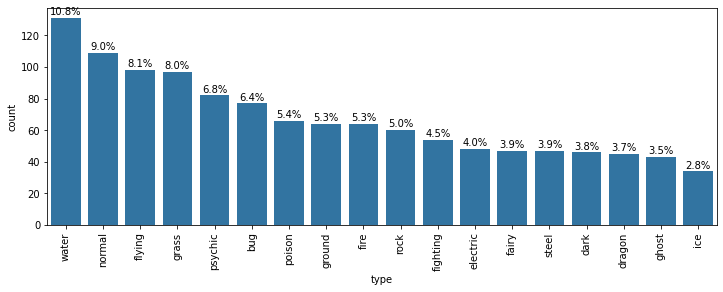

In [ ]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

Example 1. Plot a simple Pie chart

(-1.1063354030102694,
 1.1197837798494124,
 -1.114763917050899,
 1.1113552658087829)

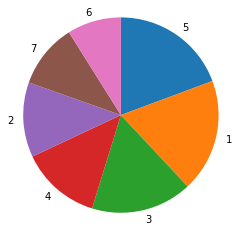

In [ ]:
# Use the same pokemon dataset
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square')

playing around with the labels and startangle

(-1.1007030436690903,
 1.1254161391905915,
 -1.1063354030102694,
 1.1197837798494124)

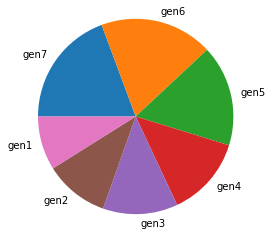

In [ ]:
# Use the same pokemon dataset
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = ['gen7','gen6','gen5', 'gen4', 'gen3','gen2', 'gen1'], startangle = 180, counterclock = False);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square')

Example 2. Plot a simple Donut plot


(-1.1063354030102694,
 1.1197837798494124,
 -1.114763917050899,
 1.1113552658087829)

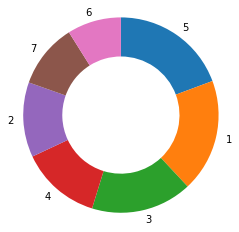

In [ ]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

#Histogram for quantitative variables

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

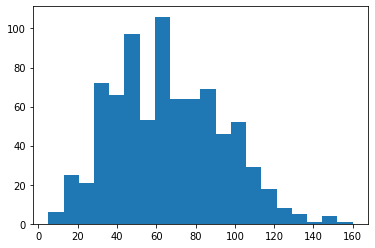

In [ ]:
plt.hist(data = pokemon, x = 'speed', bins = 20)

Example 3. Histogram with dynamic number of bins

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

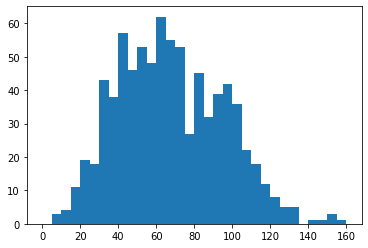

In [ ]:
# Create bins with step-size 5
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins)

Example 4. Plot the similar histogram with Seaborn's distplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


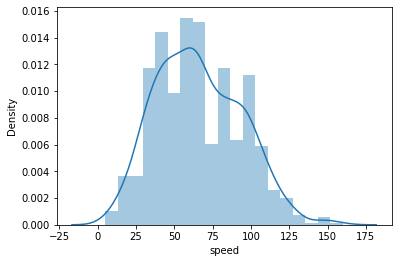

In [ ]:

sb.distplot(pokemon['speed'])



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


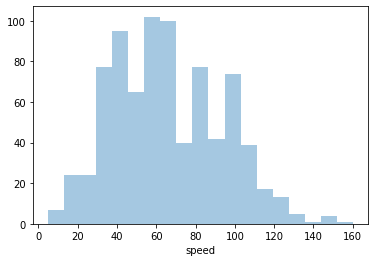

In [ ]:
# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sb.distplot(pokemon['speed'], kde=False)

Example 5. Plot two histograms side-by-side

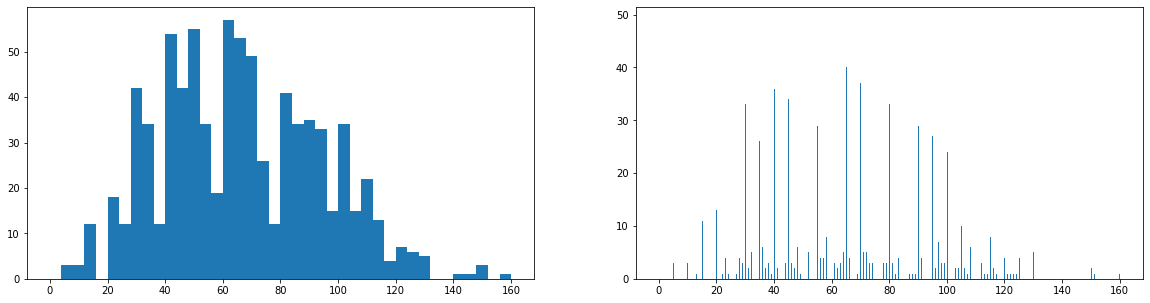

In [ ]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

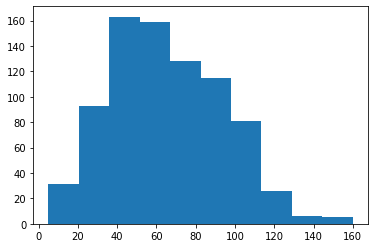

In [ ]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn.

Example 2. Use axes with seaborn.countplot()

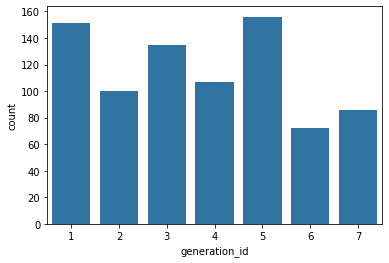

In [ ]:

fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax)

Example 2. Making gaps between individual bars using rwidth argument

In [ ]:
# #Example 2. Making gaps between individual bars

# bin_edges = np.arange(1.5, 12.5+1, 1)
# plt.hist(data=die_rolls, x='Sum', bins = bin_edges, rwidth = 0.7)
# plt.xticks(np.arange(2, 12+1, 1));


you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data. Let's see a few examples.

Example 1. Plot the histogram from the data having a skewed distribution of values


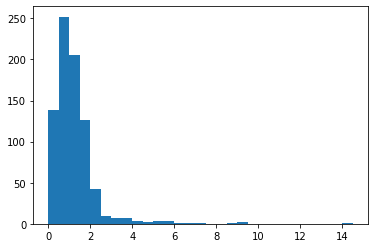

In [ ]:

# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)

# Plot the histogram for the height column
plt.hist(data=pokemon, x='height', bins=bins);

In order to change a histogram's axis limits, you can add a Matplotlib xlim() call to your code. The function takes a tuple of two numbers specifying the upper and lower bounds of the x-axis range. See the example below.

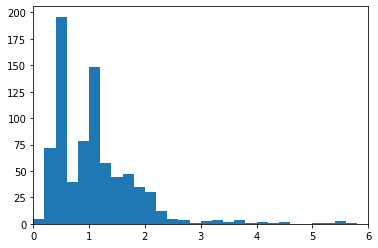

In [ ]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins);

# Set the upper and lower bounds of the bins that are displayed in the plot
# Refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,6));

In the generic example above, we might be interested in comparing patterns in other variables between data points that take values less than 6 to those that take values greater than 6.

(0.0, 6.0)

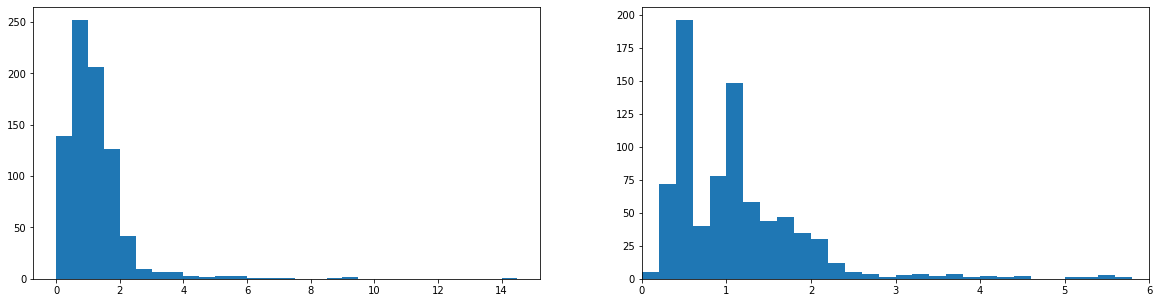

In [ ]:
# Define the figure size
plt.figure(figsize = [20, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins = bin_edges)

# histogram on right: focus in on bulk of data < 6
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins = bin_edges)
plt.xlim(0, 6) # could also be called as plt.xlim((0, 6))

Example 1 - Scale the x-axis to log-type

Text(0.5, 0, 'The x-axis limits NOT are changed. They are only scaled to log-type')

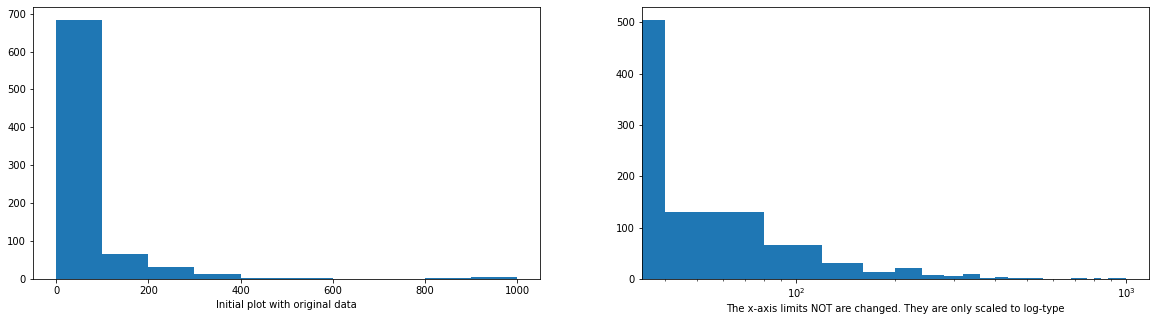

In [ ]:

plt.figure(figsize = [20, 5])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
# Display a label on the x-axis
plt.xlabel('Initial plot with original data')

# HISTOGRAM ON RIGHT 
plt.subplot(1, 2, 2)

# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
# Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type')


In [ ]:
# Describe the data
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

Example 2 - Scale the x-axis to log-type, and change the axis limit.

In [ ]:
#Example 2 - Scale the x-axis to log-type, and change the axis limit.



Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

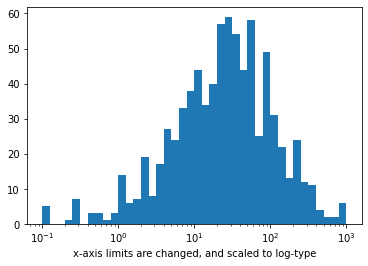

In [ ]:
# Axis transformation
# Bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-axis label
# Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type')

Example 3 - Scale the x-axis to log-type, change the axis limits, and increase the x-ticks

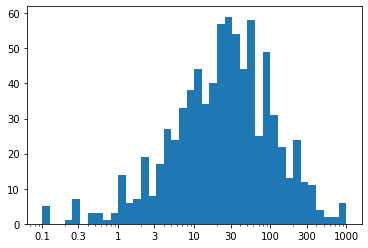

In [ ]:

# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the data from a CSV file
# Original source of data: https://www.kaggle.com/manjeetsingh/retaildataset available under C0 1.0 Universal (CC0 1.0) Public Domain Dedication License
sales_data = pd.read_csv('sales-data.csv')
sales_data.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [ ]:
sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
# Let's drop the column that do not have any NaN/None values
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=1).isna().sum()
print(na_counts)

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


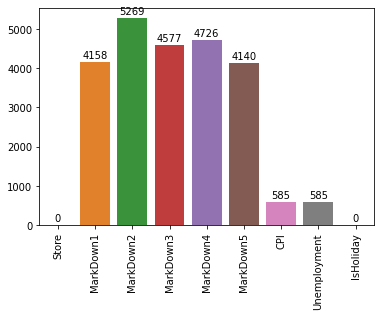

In [ ]:
# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
sb.barplot(na_counts.index.values, na_counts)

# get the current tick locations and labels
plt.xticks(rotation=90) 

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+300, count, ha = 'center', va='top')

In [ ]:
na_counts

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

#KDE

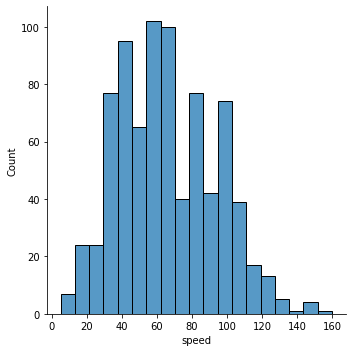

In [ ]:
# Use this new function only with Seaborn 0.11.0 and above. 
# The kind argument can take any one value from {“hist”, “kde”, “ecdf”}.
sb.displot(pokemon['speed'], kind='hist');
# Use the 'kde' kind for kernel density estimation
# sb.displot(pokemon['speed'], kind='kde');

Kernel density estimation is one way of estimating the probability density function of a variable. In a KDE plot, you can think of each observation as replaced by a small ‘lump’ of area. Stacking these lumps all together produces the final density curve. The default settings use a normal-distribution kernel, but most software that can produce KDE plots also include other kernel function options.

Seaborn's distplot function calls another function, kdeplot, to generate the KDE. The demonstration code below also uses a third function called by distplot for illustration, rugplot(). In a rugplot, data points are depicted as dashes on a number line.

Example 2. Demonstrating distplot() and rugplot() to plot the KDE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

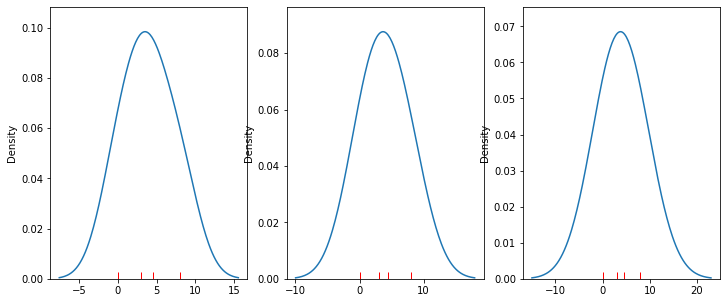

In [ ]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})


It should also be noted that there is a bandwidth parameter in KDE that specifies how wide the density lumps are. Similar to bin width for histograms, we need to choose a bandwidth size that best shows the signal in the data. A too-small bandwidth can make the data look noisier than it really is, and a too-large bandwidth can smooth out useful features that we could use to make inferences about the data. It’s good to keep this in mind in case the default bandwidths chosen by your visualization software don’t look quite right or if you need to perform further investigations.

